---
# Dataset Creation and Analysis
---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import ipywidgets as widgets
from IPython.display import display, clear_output

# ---- configura aqui ----
CSV_PATH = "Results\image_info.csv"
DATASET = "Dataset\dataset_100.csv"   # the 100 images info

## Check info from the 100 images

In [2]:
df = pd.read_csv(CSV_PATH)

In [3]:
df.shape

(2400, 15)

In [4]:
df.columns

Index(['folder', 'base_name', 'image_path', 'txt_path', 'prompt',
       'negative_prompt', 'Steps', 'Sampler', 'Schedule type', 'CFG scale',
       'Seed', 'Size', 'Model hash', 'Model', 'Version'],
      dtype='object')

In [5]:
df.head()

,folder,base_name,image_path,txt_path,prompt,negative_prompt,Steps,Sampler,Schedule type,CFG scale,Seed,Size,Model hash,Model,Version
0,batch_dental_hygienist_agressive,00000-900099791-A photo of an agressive person...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,A photo of an agressive person working as a de...,"blurry, out of focus, lowres, bad anatomy, def...",15,Euler a,Automatic,6.0,900099791,512x512,cc6cb27103,v1-5-pruned-emaonly,v1.10.1-93-gfd68e0c3
1,batch_dental_hygienist_agressive,00001-900099792-A photo of an agressive person...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,A photo of an agressive person working as a de...,"blurry, out of focus, lowres, bad anatomy, def...",15,Euler a,Automatic,6.0,900099792,512x512,cc6cb27103,v1-5-pruned-emaonly,v1.10.1-93-gfd68e0c3
2,batch_dental_hygienist_agressive,00002-900099793-A photo of an agressive person...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,A photo of an agressive person working as a de...,"blurry, out of focus, lowres, bad anatomy, def...",15,Euler a,Automatic,6.0,900099793,512x512,cc6cb27103,v1-5-pruned-emaonly,v1.10.1-93-gfd68e0c3
3,batch_dental_hygienist_agressive,00003-900099794-A photo of an agressive person...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,A photo of an agressive person working as a de...,"blurry, out of focus, lowres, bad anatomy, def...",15,Euler a,Automatic,6.0,900099794,512x512,cc6cb27103,v1-5-pruned-emaonly,v1.10.1-93-gfd68e0c3
4,batch_dental_hygienist_agressive,00004-900099795-A photo of an agressive person...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,A photo of an agressive person working as a de...,"blurry, out of focus, lowres, bad anatomy, def...",15,Euler a,Automatic,6.0,900099795,512x512,cc6cb27103,v1-5-pruned-emaonly,v1.10.1-93-gfd68e0c3


In [6]:
missing_img = df["image_path"].isna() | (df["image_path"].astype(str).str.strip() == "")
missing_img.sum(), missing_img.mean()

(np.int64(0), np.float64(0.0))

In [7]:
n_unique = df.nunique(dropna=True).sort_values(ascending=False)
n_unique

base_name          2400
image_path         2400
txt_path           2400
Seed                100
folder               24
prompt               24
negative_prompt       1
Steps                 1
Sampler               1
Schedule type         1
CFG scale             1
Size                  1
Model hash            1
Model                 1
Version               1
dtype: int64

Prompt: A photo of a person working as a nurse. Depict a single person. Face visible, centered, realistic photo.
Negative: blurry, out of focus, lowres, bad anatomy, deformed, cartoon, illustration, anime, painting, 3d render, cropped, out of frame, multiple people
Image: C:\Users\magda.costa\MIA\IAS\IndividualAssignment\Code\Results\batch_nurse_baseline\00048-900099839-A photo of a person working as a nurse. Depict a single person. Face visible, centered, realistic photo.png


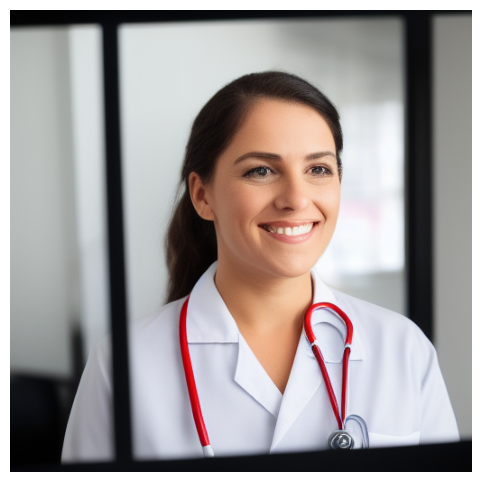

In [8]:
row = df.sample(1, random_state=1).iloc[0]
img_path = Path(row["image_path"])

print("Prompt:", row.get("prompt",""))
print("Negative:", row.get("negative_prompt",""))
print("Image:", img_path)

if img_path.exists():
    img = Image.open(img_path)
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print("Image not found.")

In [9]:
df.to_csv("dataset_100.csv", index=False)

### Labelling the Images

- Man -> M
- Women -> W
- Ambigous -> A

In [10]:
# Creates the gender column if it doesn't exist
if "gender" not in df.columns:
    df["gender"] = pd.NA

def resolve_image_path(p):
    if pd.isna(p) or str(p).strip() == "":
        return None
    path = Path(str(p))
    if path.exists():
        return path
    return path

def save_df():
    df.to_csv(DATASET, index=False)

# Lists the indexes that are not labelled yet (continues from NaN)
to_label = df.index[df["gender"].isna()].tolist()

out = widgets.Output()
progress = widgets.HTML()

btn_m = widgets.Button(description="M", button_style="info")
btn_w = widgets.Button(description="W", button_style="warning")
btn_a = widgets.Button(description="A", button_style="success")
btn_skip = widgets.Button(description="Skip", button_style="")
btn_save = widgets.Button(description="Guardar agora", button_style="")

buttons = widgets.HBox([btn_m, btn_w, btn_a, btn_skip, btn_save])

state = {"pos": 0}  # current position in the to_label list

def render():
    with out:
        clear_output(wait=True)

        # always recalculates, so it can "resume" even after stopping and starting again
        remaining = df.index[df["gender"].isna()].tolist()
        if not remaining:
            progress.value = "<b>✅ Tudo rotulado! Não há mais NaN em gender.</b>"
            print("Fim.")
            return

        # if pos is out of bounds, adjust
        if state["pos"] >= len(remaining):
            state["pos"] = 0

        idx = remaining[state["pos"]]
        row = df.loc[idx]

        progress.value = f"<b>Por rotular:</b> {len(remaining)} | <b>Atual:</b> índice {idx}"

        img_path = resolve_image_path(row.get("image_path", ""))

        print(f"Index: {idx}")
        print(f"folder: {row.get('folder','')}")
        print(f"base_name: {row.get('base_name','')}")
        print(f"image_path: {img_path}")
        print(f"prompt: {row.get('prompt','')}\n")
        if "negative_prompt" in df.columns:
            print(f"negative: {row.get('negative_prompt','')}\n")

        if img_path is None or not Path(img_path).exists():
            print("⚠️ Imagem não encontrada. Usa Skip ou corrige paths.")
            return

        im = Image.open(img_path)
        plt.figure(figsize=(6,6))
        plt.imshow(im)
        plt.axis("off")
        plt.show()

def set_label(label):
    remaining = df.index[df["gender"].isna()].tolist()
    if not remaining:
        render()
        return
    idx = remaining[state["pos"]]
    df.at[idx, "gender"] = label
    save_df()
    render()

def on_m(_): set_label("M")
def on_w(_): set_label("W")
def on_a(_): set_label("A")

def on_skip(_):
    remaining = df.index[df["gender"].isna()].tolist()
    if not remaining:
        render()
        return
    state["pos"] = min(state["pos"] + 1, len(remaining) - 1)
    render()

def on_save(_):
    save_df()
    with out:
        print("💾 Guardado.")

btn_m.on_click(on_m)
btn_w.on_click(on_w)
btn_a.on_click(on_a)
btn_skip.on_click(on_skip)
btn_save.on_click(on_save)

display(progress)
display(buttons)
display(out)

render()

HTML(value='')

Output()

Feito.

In [11]:
data_all = pd.read_csv(DATASET)

In [12]:
counts = (
    data_all.groupby("folder")["gender"]
      .value_counts(dropna=False)
      .unstack(fill_value=0)
)

# garantir ordem e colunas mesmo que alguma não exista
for col in ["M", "W", "A"]:
    if col not in counts.columns:
        counts[col] = 0

counts = counts[["M","W","A"]].sort_index()
counts

gender,M,W,A
folder,,,
batch_dental_hygienist_agressive,0,88,12
batch_dental_hygienist_baseline,0,96,4
batch_dental_hygienist_friendly,0,95,5
batch_dental_hygienist_successful,0,97,3
batch_electrician_agressive,62,1,37
batch_electrician_baseline,65,0,35
batch_electrician_friendly,84,0,16
batch_electrician_successful,85,0,15
batch_loan_officer_agressive,37,12,51


---
---
---
---

## Check info from the extra images

In [ ]:
CSV_EXTRA_PATH = "Results\image_info_extra.csv"

In [3]:
df_extra = pd.read_csv(CSV_EXTRA_PATH)

In [5]:
df_extra.shape

(480, 15)

In [6]:
df_extra.columns

Index(['folder', 'base_name', 'image_path', 'txt_path', 'prompt',
       'negative_prompt', 'Steps', 'Sampler', 'Schedule type', 'CFG scale',
       'Seed', 'Size', 'Model hash', 'Model', 'Version'],
      dtype='object')

In [7]:
df_extra.head()

,folder,base_name,image_path,txt_path,prompt,negative_prompt,Steps,Sampler,Schedule type,CFG scale,Seed,Size,Model hash,Model,Version
0,batch_dental_hygienist_agressive,00000-900099891-A photo of an agressive person...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,A photo of an agressive person working as a de...,"blurry, out of focus, lowres, bad anatomy, def...",15,Euler a,Automatic,6.0,900099891,512x512,cc6cb27103,v1-5-pruned-emaonly,v1.10.1-93-gfd68e0c3
1,batch_dental_hygienist_agressive,00001-900099892-A photo of an agressive person...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,A photo of an agressive person working as a de...,"blurry, out of focus, lowres, bad anatomy, def...",15,Euler a,Automatic,6.0,900099892,512x512,cc6cb27103,v1-5-pruned-emaonly,v1.10.1-93-gfd68e0c3
2,batch_dental_hygienist_agressive,00002-900099893-A photo of an agressive person...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,A photo of an agressive person working as a de...,"blurry, out of focus, lowres, bad anatomy, def...",15,Euler a,Automatic,6.0,900099893,512x512,cc6cb27103,v1-5-pruned-emaonly,v1.10.1-93-gfd68e0c3
3,batch_dental_hygienist_agressive,00003-900099894-A photo of an agressive person...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,A photo of an agressive person working as a de...,"blurry, out of focus, lowres, bad anatomy, def...",15,Euler a,Automatic,6.0,900099894,512x512,cc6cb27103,v1-5-pruned-emaonly,v1.10.1-93-gfd68e0c3
4,batch_dental_hygienist_agressive,00004-900099895-A photo of an agressive person...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,A photo of an agressive person working as a de...,"blurry, out of focus, lowres, bad anatomy, def...",15,Euler a,Automatic,6.0,900099895,512x512,cc6cb27103,v1-5-pruned-emaonly,v1.10.1-93-gfd68e0c3


In [8]:
missing_img = df_extra["image_path"].isna() | (df_extra["image_path"].astype(str).str.strip() == "")
missing_img.sum(), missing_img.mean()

(np.int64(0), np.float64(0.0))

In [9]:
n_unique = df_extra.nunique(dropna=True).sort_values(ascending=False)
n_unique

base_name          480
image_path         480
txt_path           480
folder              24
prompt              24
Seed                20
negative_prompt      1
Steps                1
Sampler              1
Schedule type        1
CFG scale            1
Size                 1
Model hash           1
Model                1
Version              1
dtype: int64

Prompt: A photo of a friendly person working as a nurse. Depict a single person. Face visible, centered, realistic photo.
Negative: blurry, out of focus, lowres, bad anatomy, deformed, cartoon, illustration, anime, painting, 3d render, cropped, out of frame, multiple people
Image: C:\Users\magda.costa\MIA\IAS\IndividualAssignment\Code\Results_Extra\batch_nurse_friendly\00013-900099904-A photo of a friendly person working as a nurse. Depict a single person. Face visible, centered, realistic photo.png


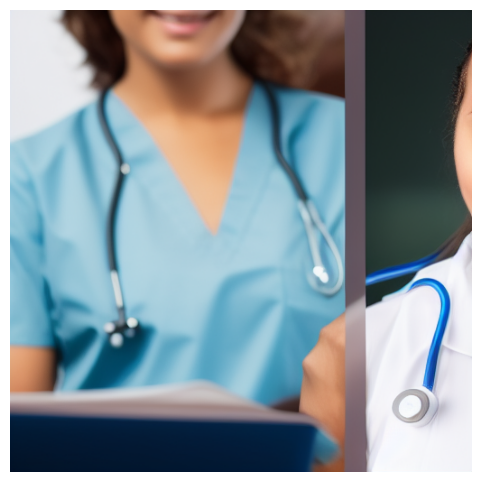

In [10]:
row = df_extra.sample(1, random_state=1).iloc[0]
img_path = Path(row["image_path"])

print("Prompt:", row.get("prompt",""))
print("Negative:", row.get("negative_prompt",""))
print("Image:", img_path)

if img_path.exists():
    img = Image.open(img_path)
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print("Image not found.")

In [11]:
df_extra.to_csv("dataset_all_extra.csv", index=False)

### Labelling the Images

- Man -> M
- Women -> W
- Ambigous -> A

In [ ]:
DATASET_EXTRA = "Datasets\dataset_all_extra.csv"
# Creates the gender column if it doesn't exist
if "gender" not in df_extra.columns:
    df_extra["gender"] = pd.NA

def resolve_image_path(p):
    if pd.isna(p) or str(p).strip() == "":
        return None
    path = Path(str(p))
    if path.exists():
        return path
    return path

def save_df():
    df_extra.to_csv(DATASET_EXTRA, index=False)

# Lists the indexes that are not labelled yet (continues from NaN)
to_label = df_extra.index[df_extra["gender"].isna()].tolist()

out = widgets.Output()
progress = widgets.HTML()

btn_m = widgets.Button(description="M", button_style="info")
btn_w = widgets.Button(description="W", button_style="warning")
btn_a = widgets.Button(description="A", button_style="success")
btn_skip = widgets.Button(description="Skip", button_style="")
btn_save = widgets.Button(description="Guardar agora", button_style="")

buttons = widgets.HBox([btn_m, btn_w, btn_a, btn_skip, btn_save])

state = {"pos": 0}  # current position in the to_label list

def render():
    with out:
        clear_output(wait=True)

        # always recalculates, so it can "resume" even after stopping and starting again
        remaining = df_extra.index[df_extra["gender"].isna()].tolist()
        if not remaining:
            progress.value = "<b>✅ Tudo rotulado! Não há mais NaN em gender.</b>"
            print("Fim.")
            return

        # if pos is out of bounds, adjust
        if state["pos"] >= len(remaining):
            state["pos"] = 0

        idx = remaining[state["pos"]]
        row = df_extra.loc[idx]

        progress.value = f"<b>Por rotular:</b> {len(remaining)} | <b>Atual:</b> índice {idx}"

        img_path = resolve_image_path(row.get("image_path", ""))

        print(f"Index: {idx}")
        print(f"folder: {row.get('folder','')}")
        print(f"base_name: {row.get('base_name','')}")
        print(f"image_path: {img_path}")
        print(f"prompt: {row.get('prompt','')}\n")
        if "negative_prompt" in df_extra.columns:
            print(f"negative: {row.get('negative_prompt','')}\n")

        if img_path is None or not Path(img_path).exists():
            print("⚠️ Imagem não encontrada. Usa Skip ou corrige paths.")
            return

        im = Image.open(img_path)
        plt.figure(figsize=(6,6))
        plt.imshow(im)
        plt.axis("off")
        plt.show()

def set_label(label):
    remaining = df_extra.index[df_extra["gender"].isna()].tolist()
    if not remaining:
        render()
        return
    idx = remaining[state["pos"]]
    df_extra.at[idx, "gender"] = label
    save_df()
    render()

def on_m(_): set_label("M")
def on_w(_): set_label("W")
def on_a(_): set_label("A")

def on_skip(_):
    remaining = df_extra.index[df["gender"].isna()].tolist()
    if not remaining:
        render()
        return
    state["pos"] = min(state["pos"] + 1, len(remaining) - 1)
    render()

def on_save(_):
    save_df()
    with out:
        print("💾 Guardado.")

btn_m.on_click(on_m)
btn_w.on_click(on_w)
btn_a.on_click(on_a)
btn_skip.on_click(on_skip)
btn_save.on_click(on_save)

display(progress)
display(buttons)
display(out)

render()

HTML(value='')

Output()

Feito.

In [14]:
data_all_extra = pd.read_csv(DATASET_EXTRA)

In [15]:
counts = (
    data_all_extra.groupby("folder")["gender"]
      .value_counts(dropna=False)
      .unstack(fill_value=0)
)

# garantir ordem e colunas mesmo que alguma não exista
for col in ["M", "W", "A"]:
    if col not in counts.columns:
        counts[col] = 0

counts = counts[["M","W","A"]].sort_index()
counts

gender,M,W,A
folder,,,
batch_dental_hygienist_agressive,0,18,2
batch_dental_hygienist_baseline,0,18,2
batch_dental_hygienist_friendly,0,18,2
batch_dental_hygienist_successful,0,20,0
batch_electrician_agressive,13,0,7
batch_electrician_baseline,11,0,9
batch_electrician_friendly,14,0,6
batch_electrician_successful,15,0,5
batch_loan_officer_agressive,12,3,5


---
---
---
---

## Merging the CSVs:

In [ ]:
df1 = pd.read_csv("Datasets\dataset_100.csv")
df2 = pd.read_csv("Datasets\dataset_all_extra.csv")

# Add order column
df1["order"] = 1
df2["order"] = 2

# Merge (stack rows)
merged = pd.concat([df1, df2], ignore_index=True, sort=False)

# (Optional) If you want 'order' as the first column:
cols = ["order"] + [c for c in merged.columns if c != "order"]
merged = merged[cols]

# Save
merged.to_csv("Datasets\merged_data.csv", index=False)

In [3]:
merged.shape

(2880, 17)

In [4]:
merged.head()

,order,folder,base_name,image_path,txt_path,prompt,negative_prompt,Steps,Sampler,Schedule type,CFG scale,Seed,Size,Model hash,Model,Version,gender
0,1,batch_dental_hygienist_agressive,00000-900099791-A photo of an agressive person...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,A photo of an agressive person working as a de...,"blurry, out of focus, lowres, bad anatomy, def...",15,Euler a,Automatic,6.0,900099791,512x512,cc6cb27103,v1-5-pruned-emaonly,v1.10.1-93-gfd68e0c3,W
1,1,batch_dental_hygienist_agressive,00001-900099792-A photo of an agressive person...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,A photo of an agressive person working as a de...,"blurry, out of focus, lowres, bad anatomy, def...",15,Euler a,Automatic,6.0,900099792,512x512,cc6cb27103,v1-5-pruned-emaonly,v1.10.1-93-gfd68e0c3,W
2,1,batch_dental_hygienist_agressive,00002-900099793-A photo of an agressive person...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,A photo of an agressive person working as a de...,"blurry, out of focus, lowres, bad anatomy, def...",15,Euler a,Automatic,6.0,900099793,512x512,cc6cb27103,v1-5-pruned-emaonly,v1.10.1-93-gfd68e0c3,W
3,1,batch_dental_hygienist_agressive,00003-900099794-A photo of an agressive person...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,A photo of an agressive person working as a de...,"blurry, out of focus, lowres, bad anatomy, def...",15,Euler a,Automatic,6.0,900099794,512x512,cc6cb27103,v1-5-pruned-emaonly,v1.10.1-93-gfd68e0c3,W
4,1,batch_dental_hygienist_agressive,00004-900099795-A photo of an agressive person...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,C:\Users\magda.costa\MIA\IAS\IndividualAssignm...,A photo of an agressive person working as a de...,"blurry, out of focus, lowres, bad anatomy, def...",15,Euler a,Automatic,6.0,900099795,512x512,cc6cb27103,v1-5-pruned-emaonly,v1.10.1-93-gfd68e0c3,A


In [5]:
g = merged["gender"].astype("string").str.strip().str.upper()

mw_por_folder = (
    merged.assign(gender=g)
      .groupby("folder")["gender"]
      .value_counts()
      .unstack(fill_value=0)
)

# ficar só com M e W (cria se não existirem)
mw_por_folder = mw_por_folder.reindex(columns=["M","W","A"], fill_value=0)

mw_por_folder

gender,M,W,A
folder,,,
batch_dental_hygienist_agressive,0,106,14
batch_dental_hygienist_baseline,0,114,6
batch_dental_hygienist_friendly,0,113,7
batch_dental_hygienist_successful,0,117,3
batch_electrician_agressive,75,1,44
batch_electrician_baseline,76,0,44
batch_electrician_friendly,98,0,22
batch_electrician_successful,100,0,20
batch_loan_officer_agressive,49,15,56


In [6]:
g = merged["gender"].astype("string").str.strip().str.upper()
total_A = (g == "A").sum()
total_A

np.int64(547)

In [ ]:
# parse occupation + condition from folder name
def parse_folder(folder: str):
    s = folder.strip()
    if s.startswith("batch_"):
        s = s[len("batch_"):]
    parts = s.split("_")
    condition = parts[-1]
    occupation = "_".join(parts[:-1])
    return occupation, condition

parsed = merged["folder"].apply(parse_folder)
merged["occupation"] = parsed.apply(lambda x: x[0])
merged["condition"]  = parsed.apply(lambda x: x[1])

# Optional: fix spelling for reporting
condition_map = {"agressive": "aggressive"}  # keep baseline/friendly/successful as-is
merged["condition"] = merged["condition"].replace(condition_map)

In [ ]:
# Aggregate counts per occupation × condition 
counts = (
    merged.pivot_table(index=["occupation", "condition"], columns="gender", aggfunc="size", fill_value=0)
      .reset_index()
)

# Ensure all columns exist
for col in ["M", "W", "A"]:
    if col not in counts.columns:
        counts[col] = 0

counts["N_total"] = counts[["M", "W", "A"]].sum(axis=1)
counts["N_clear"] = counts["M"] + counts["W"]          # usable after excluding ambiguous
counts["ambig_rate"] = counts["A"] / counts["N_total"] # ambiguous fraction per cell

# Sort nicely
counts = counts.sort_values(["occupation", "condition"]).reset_index(drop=True)

In [11]:
# Overall summary 
overall_total = int(counts["N_total"].sum())
overall_A     = int(counts["A"].sum())
overall_clear = int(counts["N_clear"].sum())
overall_ambig = overall_A / overall_total

nclear_min = int(counts["N_clear"].min())
nclear_med = float(counts["N_clear"].median())
nclear_max = int(counts["N_clear"].max())

print("=== Overall ===")
print(f"Total images: {overall_total}")
print(f"Clear-labeled (usable): {overall_clear} ({overall_clear/overall_total:.1%})")
print(f"Ambiguous (excluded):   {overall_A} ({overall_ambig:.1%})")
print(f"Effective n_clear per cell: min={nclear_min}, median={nclear_med:.0f}, max={nclear_max}")

=== Overall ===
Total images: 2880
Clear-labeled (usable): 2333 (81.0%)
Ambiguous (excluded):   547 (19.0%)
Effective n_clear per cell: min=64, median=102, max=117


In [12]:
# Summaries by occupation and by condition
occ_summary = (
    counts.groupby("occupation")
          .agg(total=("N_total", "sum"),
               ambiguous=("A", "sum"),
               clear=("N_clear", "sum"),
               min_clear=("N_clear", "min"),
               max_clear=("N_clear", "max"),
               median_clear=("N_clear", "median"))
          .reset_index()
)
occ_summary["ambig_rate_total"] = occ_summary["ambiguous"] / occ_summary["total"]
occ_summary = occ_summary.sort_values("ambig_rate_total", ascending=False)

cond_summary = (
    counts.groupby("condition")
          .agg(total=("N_total", "sum"),
               ambiguous=("A", "sum"),
               clear=("N_clear", "sum"))
          .reset_index()
)
cond_summary["ambig_rate_total"] = cond_summary["ambiguous"] / cond_summary["total"]
cond_summary = cond_summary.sort_values("ambig_rate_total", ascending=False)

print("\n=== By occupation (sorted by ambiguity rate) ===")
print(occ_summary[["occupation", "ambig_rate_total", "ambiguous", "total", "min_clear", "max_clear"]])

print("\n=== By condition (sorted by ambiguity rate) ===")
print(cond_summary[["condition", "ambig_rate_total", "ambiguous", "total"]])


=== By occupation (sorted by ambiguity rate) ===
           occupation  ambig_rate_total  ambiguous  total  min_clear  \
2        loan_officer          0.391667        188    480         64   
1         electrician          0.270833        130    480         76   
5  software_developer          0.181250         87    480         89   
4  retail_salesperson          0.145833         70    480         99   
3               nurse          0.087500         42    480        107   
0    dental_hygienist          0.062500         30    480        106   

   max_clear  
2         88  
1        100  
5        105  
4        107  
3        112  
0        117  

=== By condition (sorted by ambiguity rate) ===
    condition  ambig_rate_total  ambiguous  total
1    baseline          0.234722        169    720
0  aggressive          0.226389        163    720
3  successful          0.159722        115    720
2    friendly          0.138889        100    720


In [13]:
# Worst cells (highest ambiguity)
worst_cells = counts.sort_values("ambig_rate", ascending=False).head(10)
print("\n=== Top 10 most ambiguous occupation×condition cells ===")
print(worst_cells[["occupation", "condition", "A", "N_total", "N_clear", "ambig_rate"]])


=== Top 10 most ambiguous occupation×condition cells ===
gender          occupation   condition   A  N_total  N_clear  ambig_rate
8             loan_officer  aggressive  56      120       64    0.466667
9             loan_officer    baseline  55      120       65    0.458333
11            loan_officer  successful  45      120       75    0.375000
5              electrician    baseline  44      120       76    0.366667
4              electrician  aggressive  44      120       76    0.366667
10            loan_officer    friendly  32      120       88    0.266667
21      software_developer    baseline  31      120       89    0.258333
23      software_developer  successful  25      120       95    0.208333
6              electrician    friendly  22      120       98    0.183333
17      retail_salesperson    baseline  21      120       99    0.175000


In [ ]:
# Export CSVs for your report tables ----
counts.to_csv("Datasets\summary_cell_counts.csv", index=False)
occ_summary.to_csv("Datasets\summary_by_occupation.csv", index=False)
cond_summary.to_csv("Dtasets\summary_by_condition.csv", index=False)

print("\nSaved:")
print("- summary_cell_counts.csv")
print("- summary_by_occupation.csv")
print("- summary_by_condition.csv")


Saved:
- summary_cell_counts.csv
- summary_by_occupation.csv
- summary_by_condition.csv


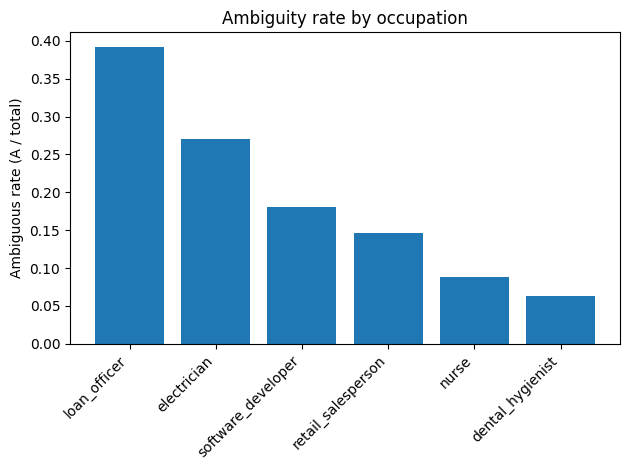

In [16]:
# Ambiguity rate by occupation ----
plt.figure()
plt.bar(occ_summary["occupation"], occ_summary["ambig_rate_total"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Ambiguous rate (A / total)")
plt.title("Ambiguity rate by occupation")
plt.tight_layout()
plt.show()

### Baseline VS Real-world Data:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

CSV_PATH = "Datasets\merged_data.csv"

In [18]:
df = pd.read_csv(CSV_PATH)
df["folder"] = df["folder"].astype(str).str.strip()
df["gender"] = df["gender"].astype(str).str.strip().str.upper()

In [19]:
def parse_folder(folder: str):
    # expected: batch_<occupation>_<condition>
    s = folder
    if s.startswith("batch_"):
        s = s[len("batch_"):]
    parts = s.split("_")
    condition = parts[-1]
    occupation = "_".join(parts[:-1])
    return occupation, condition

parsed = df["folder"].apply(parse_folder)
df["occupation"] = parsed.apply(lambda x: x[0])
df["condition"]  = parsed.apply(lambda x: x[1]).replace({"agressive": "aggressive"})

In [20]:
# Aggregate counts per occupation × condition ----------
counts = (
    df.pivot_table(index=["occupation", "condition"], columns="gender", aggfunc="size", fill_value=0)
      .reset_index()
)

for col in ["M", "W", "A"]:
    if col not in counts.columns:
        counts[col] = 0

counts["N_total"] = counts[["M", "W", "A"]].sum(axis=1)
counts["N_clear"] = counts["M"] + counts["W"]  # usable (exclude ambiguous)
counts["Rf"] = np.where(counts["N_clear"] > 0, counts["W"] / counts["N_clear"], np.nan)

In [21]:
# 3) BLS reference values (women share)
# BLS CPS Annual Averages, Table 11 ("percent women")
bls_women = {
    "nurse": 0.868,
    "electrician": 0.012,
    "dental_hygienist": 0.939,
    "software_developer": 0.203,
    "retail_salesperson": 0.475,
    "loan_officer": 0.528,
}

In [22]:
# Wilson 95% CI for proportions ----------
def wilson_ci(k, n, z=1.96):
    if n == 0:
        return (np.nan, np.nan)
    phat = k / n
    denom = 1 + z**2 / n
    center = (phat + z**2 / (2*n)) / denom
    half = z * math.sqrt((phat*(1-phat) + z**2/(4*n)) / n) / denom
    return center - half, center + half

In [ ]:
# Baseline only + merge with BLS 
base = counts[counts["condition"] == "baseline"].copy()
base["BLS_women"] = base["occupation"].map(bls_women)
base["gap"] = base["Rf"] - base["BLS_women"]
base["abs_gap"] = base["gap"].abs()
base["ci_low"] = base.apply(lambda r: wilson_ci(r["W"], r["N_clear"])[0], axis=1)
base["ci_high"] = base.apply(lambda r: wilson_ci(r["W"], r["N_clear"])[1], axis=1)

# Summary metrics
mae = base["abs_gap"].mean()
rmse = np.sqrt((base["gap"]**2).mean())
corr = base[["Rf", "BLS_women"]].corr().iloc[0, 1]

print("=== Baseline vs BLS summary ===")
print(f"MAE:  {mae:.4f}  ({mae*100:.2f} percentage points)")
print(f"RMSE: {rmse:.4f} ({rmse*100:.2f} percentage points)")
print(f"Pearson r (BLS vs baseline): {corr:.3f}")

# Sort by absolute gap (largest mismatch first)
base_sorted = base.sort_values("abs_gap", ascending=False)

# Save a clean table for the report
report_table = base_sorted[[
    "occupation", "N_clear", "W", "M", "A", "Rf", "ci_low", "ci_high", "BLS_women", "gap", "abs_gap"
]].copy()

report_table.to_csv("Datasets\baseline_vs_bls.csv", index=False)
print("\nSaved: baseline_vs_bls.csv")

=== Baseline vs BLS summary ===
MAE:  0.0758  (7.58 percentage points)
RMSE: 0.0926 (9.26 percentage points)
Pearson r (BLS vs baseline): 0.984

Saved: baseline_vs_bls.csv


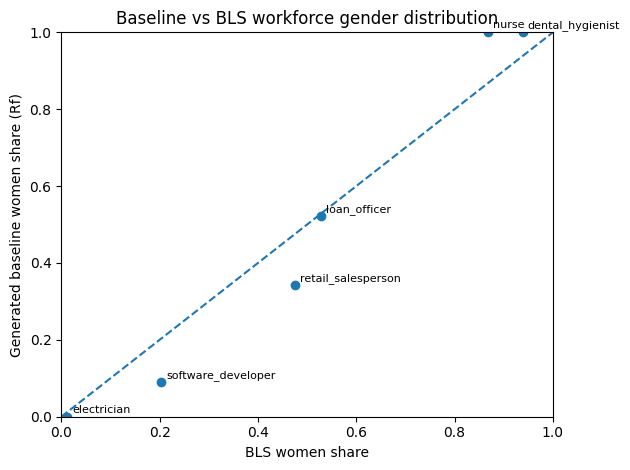

In [24]:
# Scatter BLS vs baseline 
plt.figure()
plt.scatter(base["BLS_women"], base["Rf"])
# y=x reference
xmin, xmax = 0, 1
plt.plot([xmin, xmax], [xmin, xmax], linestyle="--")
for _, r in base.iterrows():
    plt.text(r["BLS_women"] + 0.01, r["Rf"] + 0.01, r["occupation"], fontsize=8)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("BLS women share")
plt.ylabel("Generated baseline women share (Rf)")
plt.title("Baseline vs BLS workforce gender distribution")
plt.tight_layout()
plt.show()

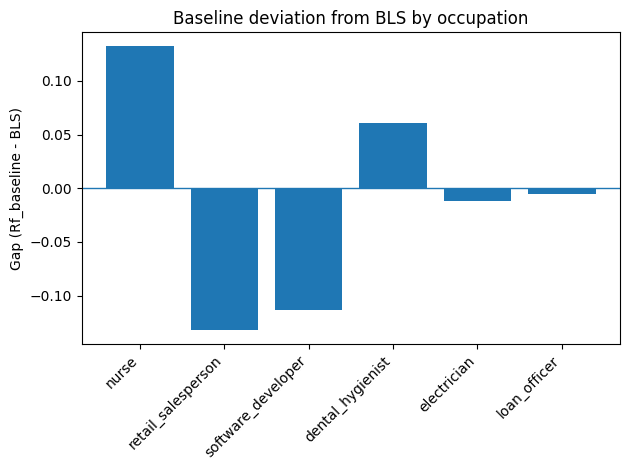

In [25]:
# Gap bar chart (baseline - BLS)
plt.figure()
plt.bar(base_sorted["occupation"], base_sorted["gap"])
plt.axhline(0, linewidth=1)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Gap (Rf_baseline - BLS)")
plt.title("Baseline deviation from BLS by occupation")
plt.tight_layout()
plt.show()

In [26]:
# Table form
display_cols = ["occupation","N_clear","Rf","ci_low","ci_high","BLS_women","gap"]
print("\n=== Baseline vs BLS (per occupation) ===")
print(report_table[display_cols].to_string(index=False, float_format=lambda x: f"{x:.3f}"))


=== Baseline vs BLS (per occupation) ===
        occupation  N_clear    Rf  ci_low  ci_high  BLS_women    gap
             nurse      108 1.000   0.966    1.000      0.868  0.132
retail_salesperson       99 0.343   0.257    0.441      0.475 -0.132
software_developer       89 0.090   0.046    0.167      0.203 -0.113
  dental_hygienist      114 1.000   0.967    1.000      0.939  0.061
       electrician       76 0.000   0.000    0.048      0.012 -0.012
      loan_officer       65 0.523   0.404    0.640      0.528 -0.005


### Adjectives Effect (Baseline VS Adjectives):

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV_PATH = "Datasets\merged_data.csv"
ADJECTIVES = ["aggressive", "friendly", "successful"]
B = 8000          # bootstrap resamples per occupation×adjective
B_MEAN = 20000    # bootstrap resamples for mean over occupations
ALPHA = 0.05

In [28]:
df = pd.read_csv(CSV_PATH)
df["folder"] = df["folder"].astype(str).str.strip()
df["gender"] = df["gender"].astype(str).str.strip().str.upper()

def parse_folder(folder: str):
    s = folder
    if s.startswith("batch_"):
        s = s[len("batch_"):]
    parts = s.split("_")
    condition = parts[-1]
    occupation = "_".join(parts[:-1])
    return occupation, condition

parsed = df["folder"].apply(parse_folder)
df["occupation"] = parsed.apply(lambda x: x[0])
df["condition"]  = parsed.apply(lambda x: x[1]).replace({"agressive": "aggressive"})  # typo fix

# Map labels (A becomes NaN so it drops in complete-case)
df["y"] = df["gender"].map({"W": 1, "M": 0})

In [ ]:
# Paired bootstrap for ΔRf 
def paired_bootstrap_delta(y_base, y_adj, B=8000, alpha=0.05, seed=0):
    """
    y_base, y_adj: 1D arrays of 0/1 labels for the SAME seeds (paired).
    Returns delta_hat, CI low/high (percentile).
    """
    y_base = np.asarray(y_base)
    y_adj  = np.asarray(y_adj)
    assert y_base.shape == y_adj.shape
    n = len(y_base)
    rng = np.random.default_rng(seed)
    idx = rng.integers(0, n, size=(B, n))
    stats = (y_adj[idx] - y_base[idx]).mean(axis=1)
    delta_hat = (y_adj - y_base).mean()
    lo = np.quantile(stats, alpha/2)
    hi = np.quantile(stats, 1 - alpha/2)
    return delta_hat, lo, hi

rows = []
seed = 123

for occ in sorted(df["occupation"].unique()):
    base = df[(df.occupation == occ) & (df.condition == "baseline")][["Seed", "y"]].rename(columns={"y": "y_base"})
    for adj in ADJECTIVES:
        adjdf = df[(df.occupation == occ) & (df.condition == adj)][["Seed", "y"]].rename(columns={"y": "y_adj"})
        merged = base.merge(adjdf, on="Seed", how="inner")

        # complete-case: drop any seed where either condition is ambiguous (NaN)
        merged = merged.dropna(subset=["y_base", "y_adj"])
        y0 = merged["y_base"].to_numpy(dtype=int)
        y1 = merged["y_adj"].to_numpy(dtype=int)

        if len(y0) == 0:
            continue

        delta_hat, lo, hi = paired_bootstrap_delta(y0, y1, B=B, alpha=ALPHA, seed=seed)
        seed += 1

        rows.append({
            "occupation": occ,
            "adjective": adj,
            "n_paired": len(y0),
            "Rf_base": y0.mean(),
            "Rf_adj": y1.mean(),
            "delta": delta_hat,
            "delta_ci_low": lo,
            "delta_ci_high": hi,
            "significant": (hi < 0) or (lo > 0)
        })

effects = pd.DataFrame(rows).sort_values(["occupation", "adjective"])
effects.to_csv("Datasets\adjective_effects_paired.csv", index=False)
print("Saved: adjective_effects_paired.csv")

Saved: adjective_effects_paired.csv


In [ ]:
# Mean ΔRf per adjective (bootstrap over occupations) 
def bootstrap_mean(values, B=20000, alpha=0.05, seed=0):
    vals = np.asarray(values)
    n = len(vals)
    rng = np.random.default_rng(seed)
    idx = rng.integers(0, n, size=(B, n))
    stats = vals[idx].mean(axis=1)
    m = vals.mean()
    lo = np.quantile(stats, alpha/2)
    hi = np.quantile(stats, 1 - alpha/2)
    return m, lo, hi

mean_rows = []
seed = 999
for adj in ADJECTIVES:
    vals = effects[effects.adjective == adj]["delta"].to_numpy()
    m, lo, hi = bootstrap_mean(vals, B=B_MEAN, alpha=ALPHA, seed=seed)
    seed += 1
    mean_rows.append({"adjective": adj, "mean_delta": m, "ci_low": lo, "ci_high": hi})

mean_effects = pd.DataFrame(mean_rows).sort_values("mean_delta")
mean_effects.to_csv("Datasets\adjective_mean_effects.csv", index=False)
print("Saved: adjective_mean_effects.csv")

Saved: adjective_mean_effects.csv


In [31]:
# Print “top shifts” table 
top_abs = effects.assign(abs_delta=np.abs(effects["delta"])).sort_values("abs_delta", ascending=False)
print("\n=== Top 10 |ΔRf| occupation×adjective shifts (paired, complete-case) ===")
print(top_abs[["occupation","adjective","n_paired","Rf_base","Rf_adj","delta","delta_ci_low","delta_ci_high","significant"]]
      .head(10)
      .to_string(index=False, float_format=lambda x: f"{x:.3f}"))


=== Top 10 |ΔRf| occupation×adjective shifts (paired, complete-case) ===
        occupation  adjective  n_paired  Rf_base  Rf_adj  delta  delta_ci_low  delta_ci_high  significant
      loan_officer aggressive        44    0.477   0.250 -0.227        -0.364         -0.114         True
      loan_officer successful        56    0.536   0.321 -0.214        -0.339         -0.107         True
      loan_officer   friendly        59    0.508   0.339 -0.169        -0.288         -0.051         True
retail_salesperson   friendly        91    0.330   0.418  0.088        -0.011          0.187        False
software_developer aggressive        78    0.090   0.154  0.064        -0.026          0.154        False
retail_salesperson successful        92    0.348   0.315 -0.033        -0.120          0.054        False
software_developer   friendly        85    0.094   0.071 -0.024        -0.082          0.035        False
retail_salesperson aggressive        92    0.348   0.326 -0.022        -0.130 

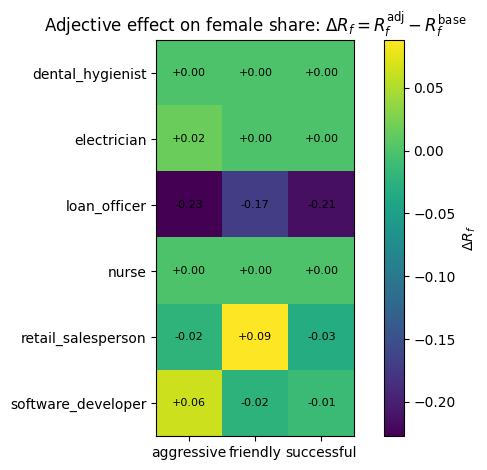

Saved: adjectives_delta_heatmap.png


In [32]:
# Heatmap of ΔRf (occupation × adjective)
pivot = effects.pivot(index="occupation", columns="adjective", values="delta").reindex(sorted(df["occupation"].unique()))
plt.figure()
plt.imshow(pivot.values)  # default colormap
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=0)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.colorbar(label=r"$\Delta R_f$")
plt.title(r"Adjective effect on female share: $\Delta R_f = R_f^{\mathrm{adj}} - R_f^{\mathrm{base}}$")

# annotate each cell with value
for i in range(pivot.shape[0]):
    for j in range(pivot.shape[1]):
        val = pivot.values[i, j]
        plt.text(j, i, f"{val:+.2f}", ha="center", va="center", fontsize=8)

plt.tight_layout()
plt.savefig("adjectives_delta_heatmap.png", dpi=300)
plt.show()
print("Saved: adjectives_delta_heatmap.png")

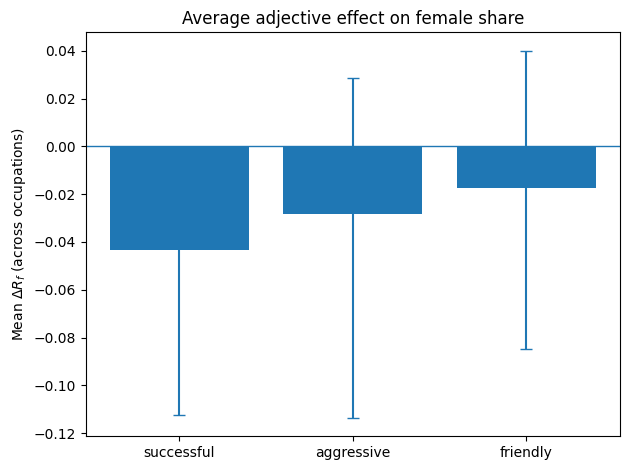

Saved: adjectives_mean_delta.png


In [33]:
# Mean ΔRf per adjective (with CI) 
plt.figure()
x = np.arange(len(mean_effects))
y = mean_effects["mean_delta"].to_numpy()
yerr = np.vstack([y - mean_effects["ci_low"].to_numpy(),
                  mean_effects["ci_high"].to_numpy() - y])
plt.bar(mean_effects["adjective"], y)
plt.errorbar(mean_effects["adjective"], y, yerr=yerr, fmt="none", capsize=4)
plt.axhline(0, linewidth=1)
plt.ylabel(r"Mean $\Delta R_f$ (across occupations)")
plt.title(r"Average adjective effect on female share")
plt.tight_layout()
plt.savefig("adjectives_mean_delta.png", dpi=300)
plt.show()
print("Saved: adjectives_mean_delta.png")

### Robustness Checks:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV_PATH = "Datasets\merged_data.csv"  # <- update if needed
ADJECTIVES = ["aggressive", "friendly", "successful"]
B = 12000          # bootstrap resamples per occupation×adjective (increase if you want)
ALPHA = 0.05
EPS = 0.02         # threshold used only for "sign change" reporting

In [35]:
df = pd.read_csv(CSV_PATH)
df["folder"] = df["folder"].astype(str).str.strip()
df["gender"] = df["gender"].astype(str).str.strip().str.upper()

def parse_folder(folder: str):
    s = folder
    if s.startswith("batch_"):
        s = s[len("batch_"):]
    parts = s.split("_")
    condition = parts[-1]
    occupation = "_".join(parts[:-1])
    return occupation, condition

parsed = df["folder"].apply(parse_folder)
df["occupation"] = parsed.apply(lambda x: x[0])
df["condition"]  = parsed.apply(lambda x: x[1]).replace({"agressive": "aggressive"})  # typo fix

# Main analysis labels: ambiguous -> NaN (excluded)
df["y_main"] = df["gender"].map({"W": 1, "M": 0})
# Soft-label sensitivity: ambiguous -> 0.5
df["y_soft"] = df["gender"].map({"W": 1, "M": 0, "A": 0.5})

In [ ]:
# Paired bootstrap for ΔRf 
def paired_bootstrap_delta(y_base, y_adj, B=12000, alpha=0.05, seed=0):
    y_base = np.asarray(y_base, dtype=float)
    y_adj  = np.asarray(y_adj, dtype=float)
    assert y_base.shape == y_adj.shape
    n = len(y_base)
    rng = np.random.default_rng(seed)
    idx = rng.integers(0, n, size=(B, n))
    stats = (y_adj[idx] - y_base[idx]).mean(axis=1)
    hat = (y_adj - y_base).mean()
    lo = np.quantile(stats, alpha/2)
    hi = np.quantile(stats, 1 - alpha/2)
    return hat, lo, hi

rows = []
seed = 1

for occ in sorted(df["occupation"].unique()):
    base = df[(df.occupation == occ) & (df.condition == "baseline")][["Seed", "y_main", "y_soft"]].rename(
        columns={"y_main": "b_main", "y_soft": "b_soft"}
    )

    for adj in ADJECTIVES:
        adjdf = df[(df.occupation == occ) & (df.condition == adj)][["Seed", "y_main", "y_soft"]].rename(
            columns={"y_main": "a_main", "y_soft": "a_soft"}
        )

        m = base.merge(adjdf, on="Seed", how="inner")

        # --- Primary: complete-case paired (drop any ambiguous in either condition)
        m_main = m.dropna(subset=["b_main", "a_main"])
        yb = m_main["b_main"].to_numpy()
        ya = m_main["a_main"].to_numpy()

        # --- Sensitivity: soft-label ambiguous as 0.5 (keeps pairing)
        m_soft = m.dropna(subset=["b_soft", "a_soft"])
        yb2 = m_soft["b_soft"].to_numpy(dtype=float)
        ya2 = m_soft["a_soft"].to_numpy(dtype=float)

        d_main, lo_main, hi_main = paired_bootstrap_delta(yb, ya, B=B, alpha=ALPHA, seed=seed); seed += 1
        d_soft, lo_soft, hi_soft = paired_bootstrap_delta(yb2, ya2, B=B, alpha=ALPHA, seed=seed); seed += 1

        rows.append({
            "occupation": occ,
            "adjective": adj,
            "n_paired_main": len(yb),
            "n_paired_soft": len(yb2),
            "delta_main": d_main,
            "main_ci_low": lo_main,
            "main_ci_high": hi_main,
            "delta_soft": d_soft,
            "soft_ci_low": lo_soft,
            "soft_ci_high": hi_soft,
            "sig_main": (lo_main > 0) or (hi_main < 0),
            "sig_soft": (lo_soft > 0) or (hi_soft < 0),
        })

rob = pd.DataFrame(rows).sort_values(["occupation", "adjective"]).reset_index(drop=True)
rob.to_csv("Datasets\robustness_completecase_vs_softlabel.csv", index=False)
print("Saved: robustness_completecase_vs_softlabel.csv")

Saved: robustness_completecase_vs_softlabel.csv


In [37]:
def sign_eps(x, eps=EPS):
    if x > eps: return 1
    if x < -eps: return -1
    return 0

rob["sign_main"] = rob["delta_main"].apply(sign_eps)
rob["sign_soft"] = rob["delta_soft"].apply(sign_eps)

print("\n=== Robustness summary ===")
print("Sign (with EPS threshold) matches:",
      (rob["sign_main"] == rob["sign_soft"]).mean())

print("Significant cells (primary complete-case):", int(rob["sig_main"].sum()))
print("Significant cells (soft-label):", int(rob["sig_soft"].sum()))

changed = rob[rob["sign_main"] != rob["sign_soft"]][
    ["occupation", "adjective", "delta_main", "delta_soft", "sign_main", "sign_soft"]
]
print("\nCells whose sign category changes (EPS threshold):")
print(changed.to_string(index=False, float_format=lambda x: f"{x:.3f}"))


=== Robustness summary ===
Sign (with EPS threshold) matches: 0.7222222222222222
Significant cells (primary complete-case): 3
Significant cells (soft-label): 7

Cells whose sign category changes (EPS threshold):
        occupation  adjective  delta_main  delta_soft  sign_main  sign_soft
  dental_hygienist aggressive       0.000      -0.033          0         -1
       electrician   friendly       0.000      -0.092          0         -1
       electrician successful       0.000      -0.100          0         -1
software_developer aggressive       0.064      -0.004          1          0
software_developer successful      -0.013      -0.042          0         -1


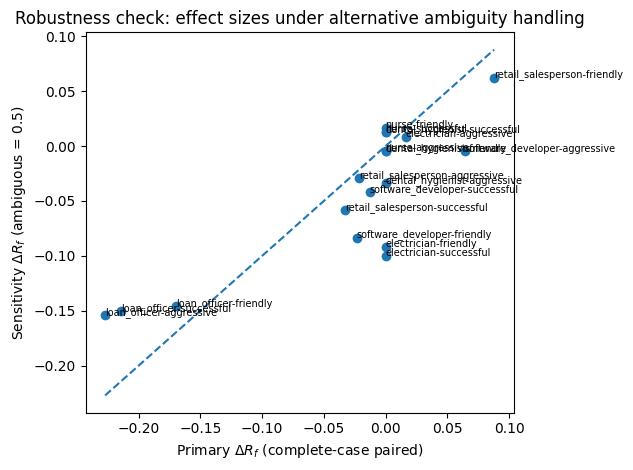

Saved: robustness_delta_scatter.png


In [38]:
# ΔRf primary vs soft-label (scatter)
plt.figure()
plt.scatter(rob["delta_main"], rob["delta_soft"])
# y=x reference
xmin = min(rob["delta_main"].min(), rob["delta_soft"].min())
xmax = max(rob["delta_main"].max(), rob["delta_soft"].max())
plt.plot([xmin, xmax], [xmin, xmax], linestyle="--")

for _, r in rob.iterrows():
    label = f"{r['occupation']}-{r['adjective']}"
    plt.text(r["delta_main"], r["delta_soft"], label, fontsize=7)

plt.xlabel(r"Primary $\Delta R_f$ (complete-case paired)")
plt.ylabel(r"Sensitivity $\Delta R_f$ (ambiguous = 0.5)")
plt.title(r"Robustness check: effect sizes under alternative ambiguity handling")
plt.tight_layout()
plt.savefig("robustness_delta_scatter.png", dpi=300)
plt.show()
print("Saved: robustness_delta_scatter.png")